In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import mean_absolute_error

In [11]:
df = pd.read_excel("Fire_Weather_Data.xlsx")

In [12]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, shuffle = False)

In [13]:
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])

In [14]:
# Scaling the data using MinMax Scaler.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(df_train.drop(["FWI"],axis=1).values)
Y_train = scaler.fit_transform(df_train["FWI"].values.reshape(-1,1))
X_test = scaler.fit_transform(df_test.drop(["FWI"],axis=1).values)
Y_test = scaler.fit_transform(df_test["FWI"].values.reshape(-1,1))

In [15]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(361, 10)
(361, 1)
(156, 10)
(156, 1)


In [16]:
def denormalize(df,norm_data):
    df = df["FWI"].values.reshape(-1,1)
    norm_data = norm_data.reshape(-1,1)
    scl = MinMaxScaler()
    a = scl.fit_transform(df)
    new = scl.inverse_transform(norm_data)
    
    return new

In [18]:
#-----------------------------------------------------------------------------------------------------

In [17]:
#linear regression model.
regression_model = linear_model.LinearRegression()
regression_model.fit(X_train, Y_train)
pred = regression_model.predict(X_test)

In [18]:
print(mean_squared_error(Y_test,pred))

0.023314887842147844


In [19]:
y_test = denormalize(df_test,Y_test)
pred = denormalize(df_test,pred)

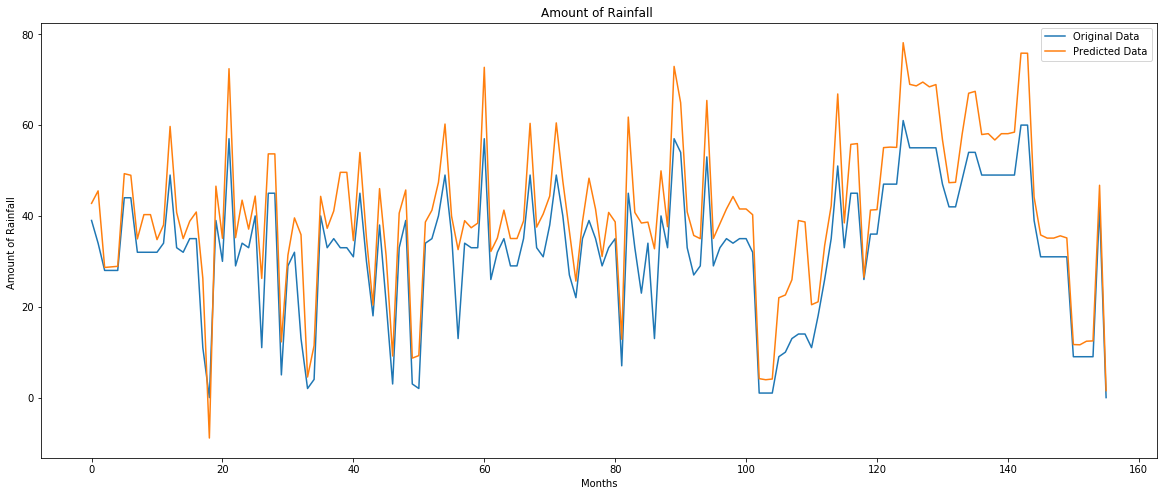

In [20]:
plt.figure(figsize=[20,8])
plt.plot(range(y_test.shape[0]),y_test,label="Original Data")
plt.plot(range(y_test.shape[0]),pred,label="Predicted Data")
plt.legend(loc='best')
plt.ylabel('Amount of Rainfall ')
plt.xlabel('Months')
plt.title('Amount of Rainfall ')
plt.show()

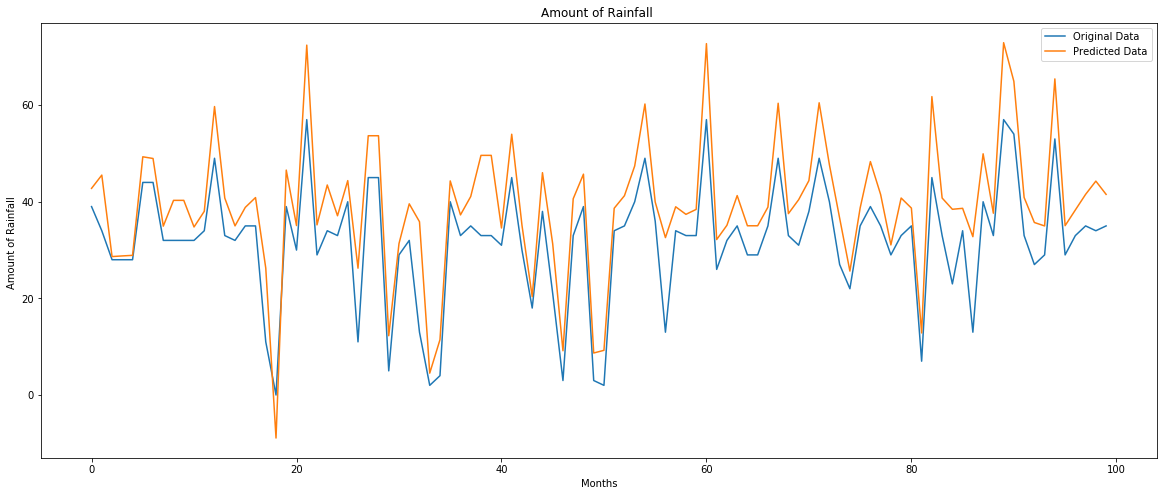

In [21]:
plt.figure(figsize=[20,8])
plt.plot(range(100),y_test[:100],label="Original Data")
plt.plot(range(100),pred[:100],label="Predicted Data")
plt.legend(loc='best')
plt.ylabel('Amount of Rainfall ')
plt.xlabel('Months')
plt.title('Amount of Rainfall ')
plt.show()

In [22]:
print(mean_absolute_error(y_test,pred))

8.008872423818161


In [23]:
#-----------------------------------------------------------------------------------------------------

In [24]:
from sklearn.svm import SVR
# SVM model
model = SVR(gamma='auto', C=1000, epsilon=0.02)
model.fit(X_train, Y_train.reshape(Y_train.shape[0],)) 
y_pred1 = model.predict(X_test)

In [25]:
y_pred1 = denormalize(df_test,y_pred1)

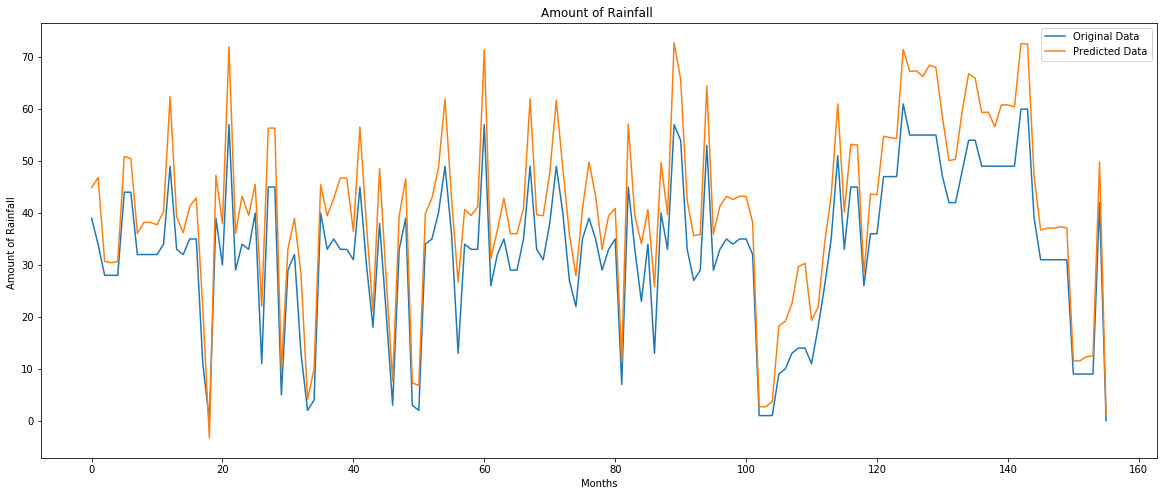

In [26]:
plt.figure(figsize=[20,8])
plt.plot(range(y_test.shape[0]),y_test,label="Original Data")
plt.plot(range(y_test.shape[0]),y_pred1,label="Predicted Data")
plt.legend(loc='best')
plt.ylabel('Amount of Rainfall ')
plt.xlabel('Months')
plt.title('Amount of Rainfall ')
plt.show()

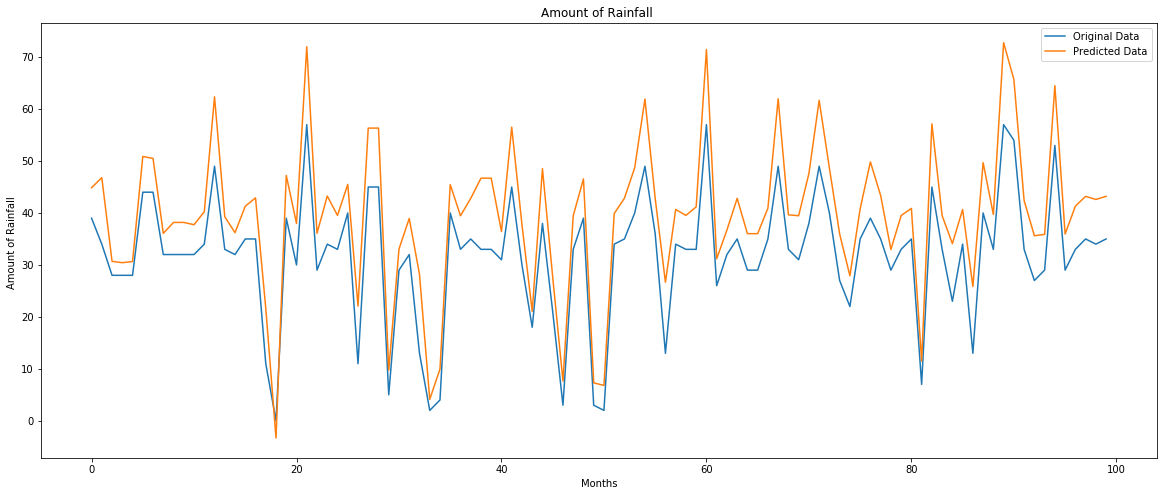

In [27]:
plt.figure(figsize=[20,8])
plt.plot(range(100),y_test[:100],label="Original Data")
plt.plot(range(100),y_pred1[:100],label="Predicted Data")
plt.legend(loc='best')
plt.ylabel('Amount of Rainfall ')
plt.xlabel('Months')
plt.title('Amount of Rainfall ')
plt.show()

In [28]:
print(mean_absolute_error(y_test,y_pred1))

8.068045687990512


In [29]:
print("RMSE : ", np.sqrt(np.mean(np.square(y_test-y_pred1))))

RMSE :  8.725808242253295


In [44]:
#-----------------------------------------------------------------------------------------------------